# Motivating examples
This document shows how SparseSC can be used in places where simple difference-in-differences can't.

## Basic setup

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#%matplotlib inline

try:
    import SparseSC as SC
except ImportError:
    raise RuntimeError("SparseSC is not installed. use 'pip install -e .' from repo root to install in dev mode")

import sys
sys.path.insert(0, ".")

In [2]:
import example_graphs

In [3]:
#make sure the results are the same each time we run
random.seed(12345) 
np.random.seed(12345)

Setup common data parameters

In [4]:
N1,N0_sim,N0_not = 0,50,50
N0 = N0_sim + N0_not
N=N1+N0
treated_units = range(N1)
control_units = list(set(range(N)) - set(treated_units))
T0,T1 = 5, 5
T=T0+T1
unit_treatment_periods = np.full((N), -1)
unit_treatment_periods[treated_units] = T0
proto_te = np.hstack((np.zeros((1,T0)), np.full((1,T0), 2)))

## Differential Trends

In [5]:
proto_sim = np.array(range(0,T,1),ndmin=2)
proto_not = np.array(range(0,2*T,2),ndmin=2)
proto_tr  = proto_sim + proto_te
Y1 = np.matmul(np.ones((N1,1)), proto_tr)
Y0_sim = np.matmul(np.ones((N0_sim,1)), proto_sim) + \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y0_not = np.matmul(np.ones((N0_not,1)), proto_not)+ \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y = np.vstack((Y1,Y0_sim,Y0_not))

Motivation: Treated unit does not look like a simple average of controls

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267f490edd8>)

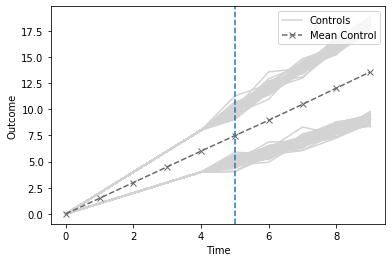

In [6]:
example_graphs.raw(Y, treated_units, control_units, T0)

Analyze

In [7]:
unit_treatment_periods = np.full((N), np.nan)
##unit_treatment_periods[treated_units = T0
X_and_Y_pre = Y[:,:5]
Y_post = Y[:,5:]
#fit_sc = SC.fit(X_and_Y_pre, Y_post, model_type="full", constrain="simplex",
#                              print_path = False, progress = False, verbose=0) #Do fast
fit_sc = SC.fit_fast(X_and_Y_pre, Y_post, model_type="full") #Do fast
#simple_summ(ret, Y)

Visualize

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267f4cde358>)

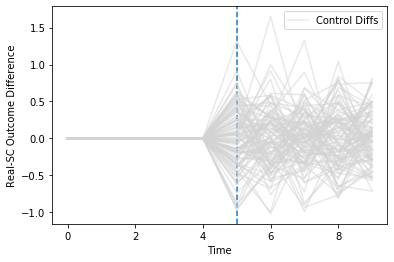

In [8]:
Y_sc = fit_sc.predict(Y)
diffs = Y - Y_sc
example_graphs.diffs_plot(diffs, [], control_units, T0)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267f91f20f0>)

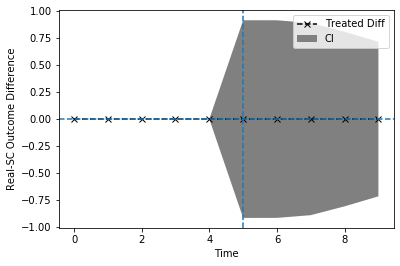

In [9]:
from SparseSC.utils.metrics_utils import AA_results
aa_res = AA_results(diffs[:,:T0], diffs[:,T0:])
example_graphs.te_plot(aa_res, T0)